In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

## Hough transform

One typical task in image processing is the detection of specific features such as lines. Lines are often present in images of man made structures. In the following image, some lines are continuous (red, green, blue) other are discontinuous (orange) but are made of aligned segments.

Instead of trying to connect touching point that may be on the same line, as one would do with a classical edge detection techniques, Hough transform is grouping pixels that belong to a same line even if line is segmented.

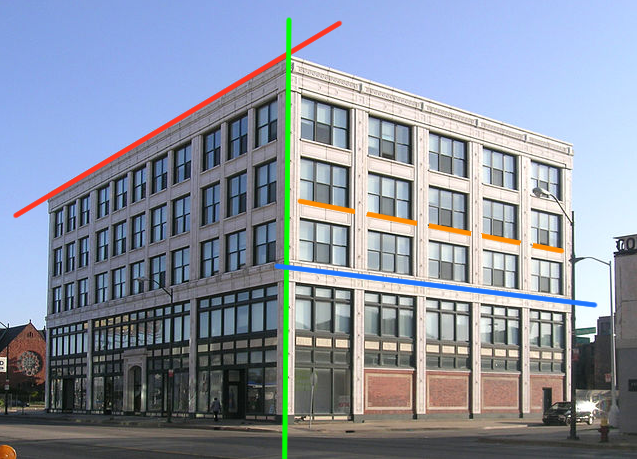

In [2]:
Image('http://homepages.ulb.ac.be/~odebeir/data/hough3.png')

<sup>based on [wikimedia commons](htatps://commons.wikimedia.org/wiki/File:Garfield_Building_Detroit.jpg)

Consider the 2D line $PQ$, this line can be expressed as:

$$y = ax+b$$

with $a$ and $b$ such tath this equation is satified both for $(x_0,y_0)$ and $(x_1,y_1)$.

All the point of the image located on the line will statisfy this equation.

We can use the normal line representation:

$$x \cos(\theta) + y \sin(\theta) = \rho$$

with $\theta$ the angle to the origin ot the normal to the line and $\rho$ its distance to the origin, so a line is defined by its two parameters $(\theta,\rho)$.

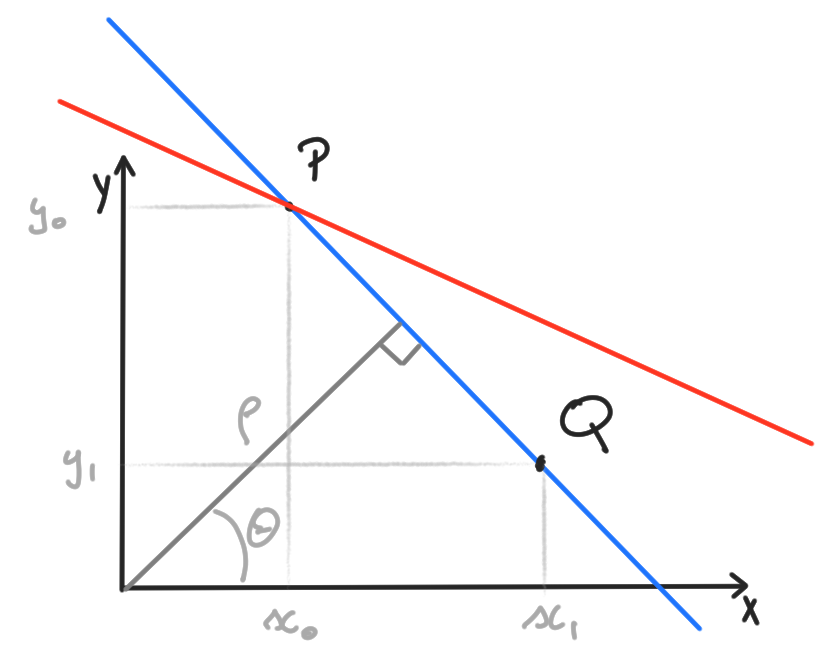

In [3]:
Image('http://homepages.ulb.ac.be/~odebeir/data/hough1.png')

The point $P$ will also belong to the red line that is defined by two others $(\theta_r,\rho_r)$ parameters, ..., infact, $P$ belong to an infinity of lines such that:

$$x_0 \cos(\theta) + y_0 \sin(\theta) = \rho$$

is statisfied. For a point $P$ with $x_0= 0$ the set of parameters for lines passing trough P is given by:
$$\rho = y_0 \sin(\theta)$$

as illustrated below, be carrefull, the axis are now the *parameters space* $(\theta,\rho)$


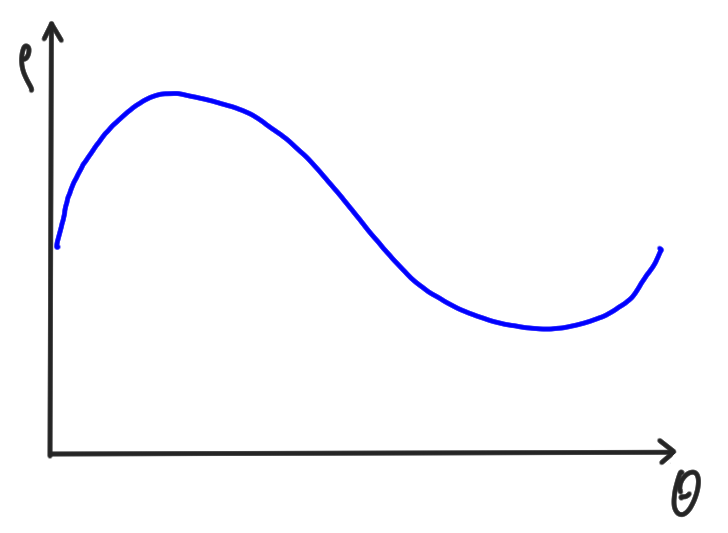

In [4]:
Image('http://homepages.ulb.ac.be/~odebeir/data/hough4.png')


For **each point** in the image space, one can build **one sinusoid** in the parameter space (a weighted combinaison of a sine and a cosine).

If we draw one sinusoid for each point of the $PQ$ line, we get:

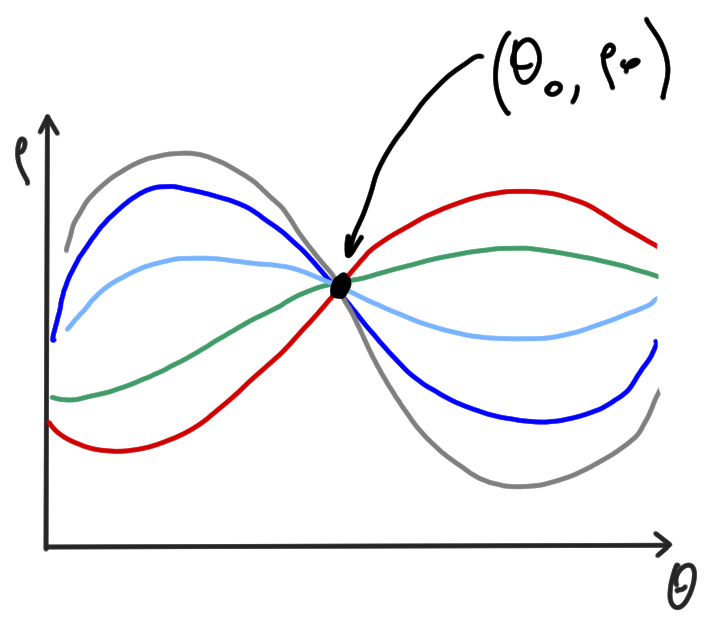

In [5]:
Image('http://homepages.ulb.ac.be/~odebeir/data/hough5.png')

all the  curves are crossing at the same point in the parameters space $(\theta_0,\rho_0)$ which correspond to the parameters of the $PQ$ line.

We have now a method to detect all the straight lines in an image.

* we detect good candidates pixels, i.e. borders
* for each pixel of these borders we add a sinusoid in a discretized $(\theta,\rho)$ parameters space
* lines parameters are position in the parameters space where the count is high

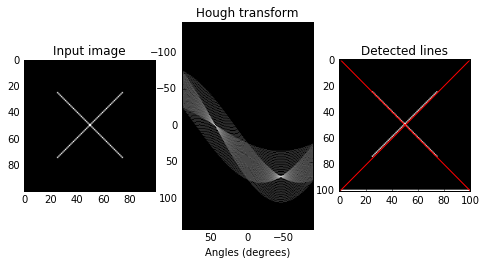

In [6]:
#example from http://scikit-image.org/docs/dev/auto_examples/plot_line_hough_transform.html
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny

import numpy as np
import matplotlib.pyplot as plt

# Construct test image

image = np.zeros((100, 100))

# Classic straight-line Hough transform

idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

h, theta, d = hough_line(image)

fig, ax = plt.subplots(1, 3, figsize=(8, 4))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Input image')
ax[0].axis('image')

ax[1].imshow(np.log(1 + h),
           extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
                   d[-1], d[0]],
           cmap=plt.cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=plt.cm.gray)
rows, cols = image.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - cols * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, cols), (y0, y1), '-r')
ax[2].axis((0, cols, rows, 0))
ax[2].set_title('Detected lines')
ax[2].axis('image');


(0, 320, 230, 0)

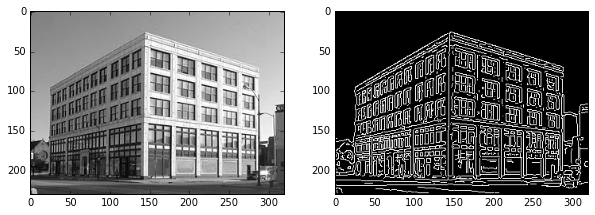

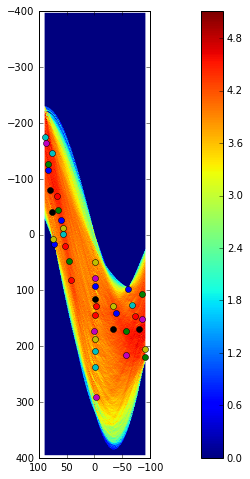

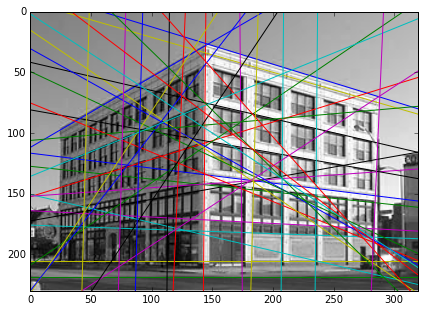

In [7]:
from skimage.io import imread

rgb = imread('https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Garfield_Building_Detroit.jpg/320px-Garfield_Building_Detroit.jpg')
g = rgb[:,:,0]
ima = canny(g)

h, theta, d = hough_line(ima)

peaks = zip(*hough_line_peaks(h, theta, d))

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(g,cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(ima,cmap=plt.cm.gray)

plt.figure(figsize=[18,8])
plt.imshow(np.log(1 + h),extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
                   d[-1], d[0]])
plt.colorbar()
for _, angle, dist in peaks:
    plt.plot(np.rad2deg(-angle),dist,'o')
    
plt.figure(figsize=[10,5])
plt.imshow(g, cmap=plt.cm.gray)
rows, cols = g.shape
for _, angle, dist in peaks:
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - cols * np.cos(angle)) / np.sin(angle)
    plt.plot((0, cols), (y0, y1), '-')
plt.axis((0, cols, rows, 0))
#plt.set_title('Detected lines')
#plt.axis('image');

Hough transform is also used to detect other primitives, such as cicles:

$$(x-x_c)^2+(y-y_c)^2 = R^2 \qquad , (x_c,y_c,R)$$

if the radius is known:

$$(x-x_c)^2+(y-y_c)^2 = R_0^2 \qquad , (x_c,y_c)$$

Hough transform is limited by the nulber of dimensions of the feature space, and in resolution since the feature space is discretized.

Example of application of the Hough transform for the line mark detection on a road.

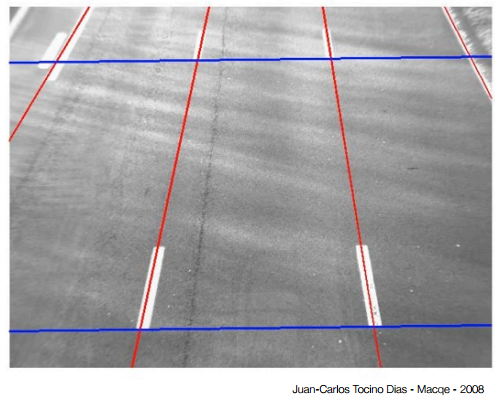

In [8]:
Image('http://homepages.ulb.ac.be/~odebeir/data/hough_ex.png')

>see also:
* Hough transform [DIP](../00-Preface/06-References.ipynb#[DIP]) p432